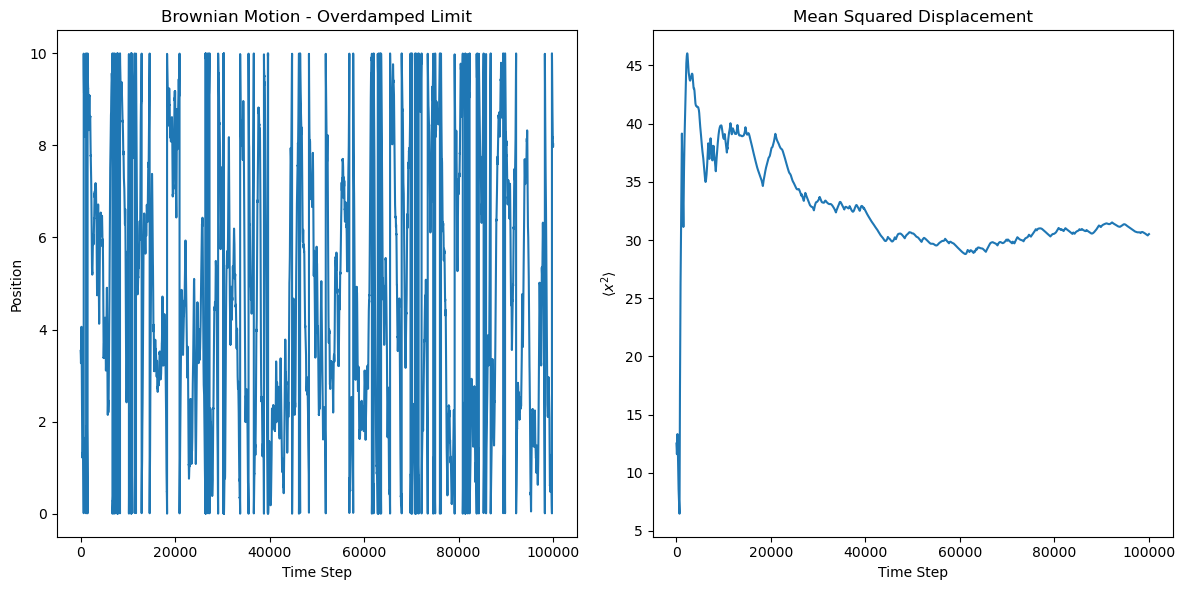

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 10
D = 1
gamma = 1
dt = 0.01
n_steps = 100000

# Initial conditions
x = np.random.uniform(0, L)
v = np.random.normal(0, np.sqrt(D * dt))

# Arrays to store results
positions = np.zeros(n_steps)
squared_displacement = np.zeros(n_steps)

for step in range(n_steps):
    # Store position
    positions[step] = x
    
    # Compute squared displacement
    squared_displacement[step] = x**2
    
    # Update velocity and position
    xi = np.random.normal(0, 1)
    v = v - (gamma / 1) * v * dt + np.sqrt(2 * D * dt) * xi
    x = x + v * dt
    
    # Apply periodic boundary conditions
    if x < 0:
        x += L
    elif x >= L:
        x -= L

# Calculate mean squared displacement <x^2> over time
mean_squared_displacement = np.cumsum(squared_displacement) / (np.arange(n_steps) + 1)

# Plot the results
plt.figure(figsize=(12, 6))

# Plot position over time
plt.subplot(1, 2, 1)
plt.plot(positions)
plt.xlabel('Time Step')
plt.ylabel('Position')
plt.title('Brownian Motion - Overdamped Limit')

# Plot mean squared displacement
plt.subplot(1, 2, 2)
plt.plot(mean_squared_displacement)
plt.xlabel('Time Step')
plt.ylabel(r'$\langle x^2 \rangle$')
plt.title('Mean Squared Displacement')

plt.tight_layout()
plt.show()


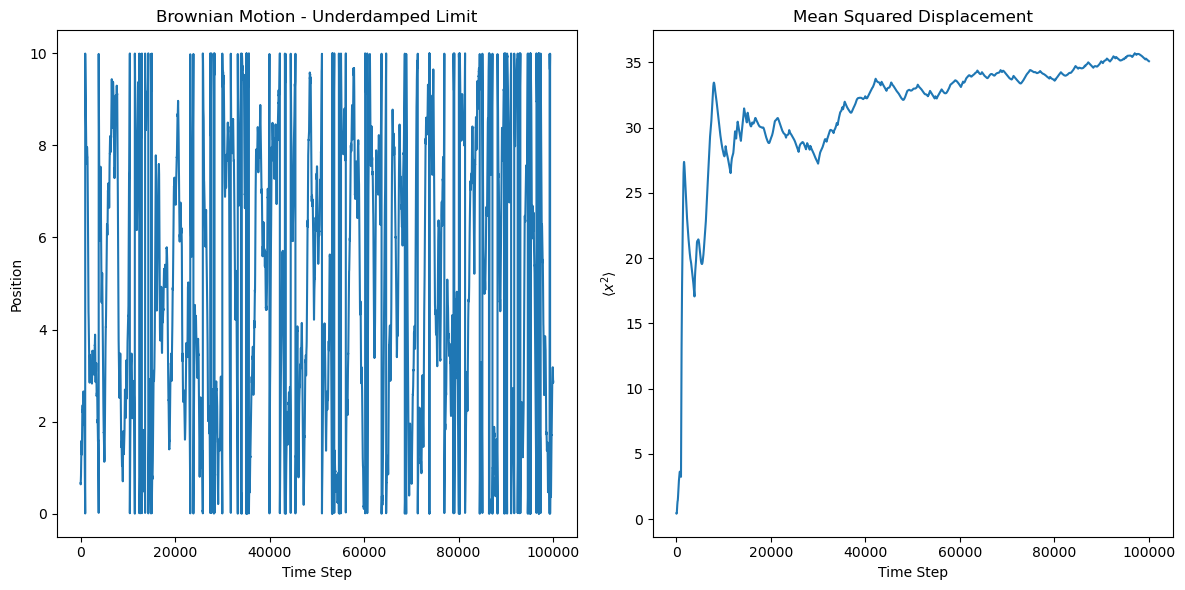

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 10
D = 1
gamma = 1
m = 1
dt = 0.01
n_steps = 100000

# Initial conditions
x = np.random.uniform(0, L)
v = np.random.normal(0, np.sqrt(D * dt))
a = - (gamma / m) * v  # Initial acceleration based on initial velocity

# Arrays to store results
positions = np.zeros(n_steps)
squared_displacement = np.zeros(n_steps)

for step in range(n_steps):
    # Store position and squared displacement
    positions[step] = x
    squared_displacement[step] = x**2
    
    # Update position
    x = x + v * dt + 0.5 * a * (dt ** 2)
    
    # Compute new acceleration
    xi = np.random.normal(0, 1)
    a_new = - (gamma / m) * v + np.sqrt(2 * D / dt) * xi
    
    # Update velocity
    v = v + 0.5 * (a + a_new) * dt
    
    # Update acceleration for the next step
    a = a_new
    
    # Apply periodic boundary conditions
    if x < 0:
        x += L
    elif x >= L:
        x -= L

# Calculate mean squared displacement <x^2> over time
mean_squared_displacement = np.cumsum(squared_displacement) / (np.arange(n_steps) + 1)

# Plot the results
plt.figure(figsize=(12, 6))

# Plot position over time
plt.subplot(1, 2, 1)
plt.plot(positions)
plt.xlabel('Time Step')
plt.ylabel('Position')
plt.title('Brownian Motion - Underdamped Limit')

# Plot mean squared displacement
plt.subplot(1, 2, 2)
plt.plot(mean_squared_displacement)
plt.xlabel('Time Step')
plt.ylabel(r'$\langle x^2 \rangle$')
plt.title('Mean Squared Displacement')

plt.tight_layout()
plt.show()



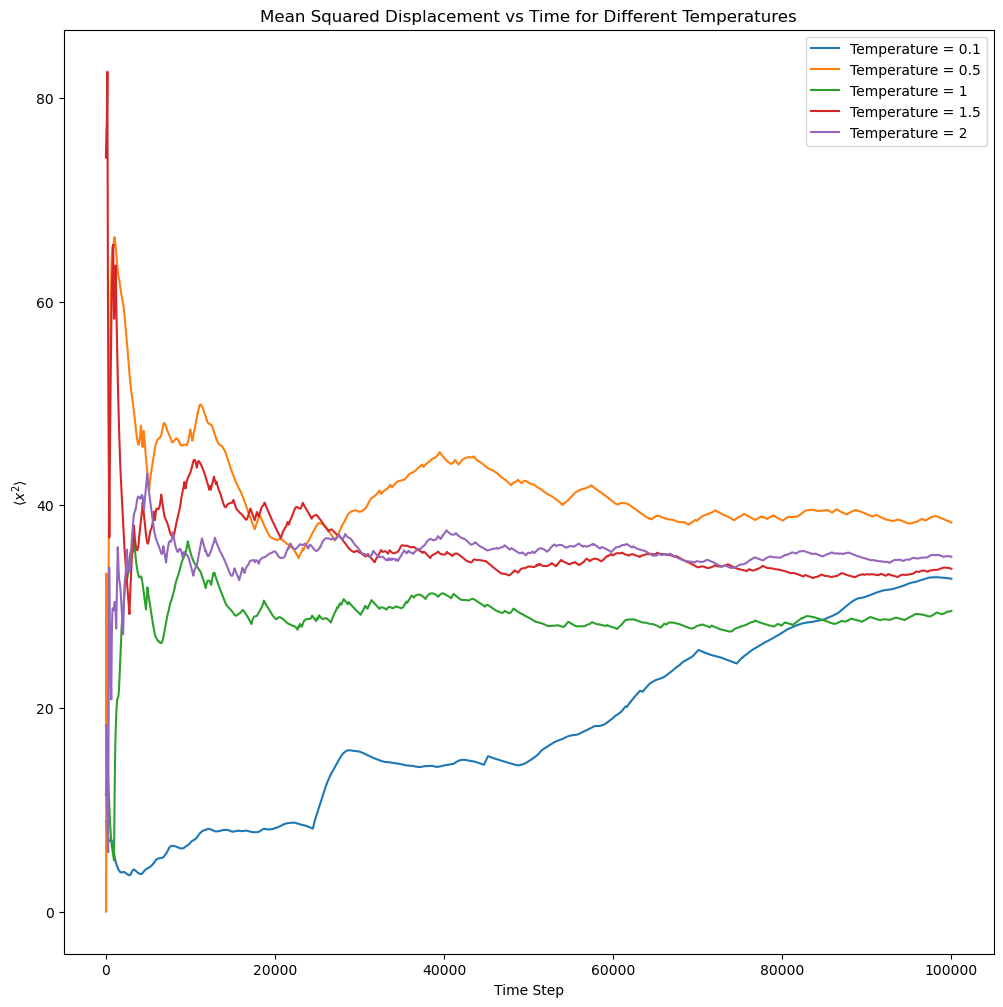

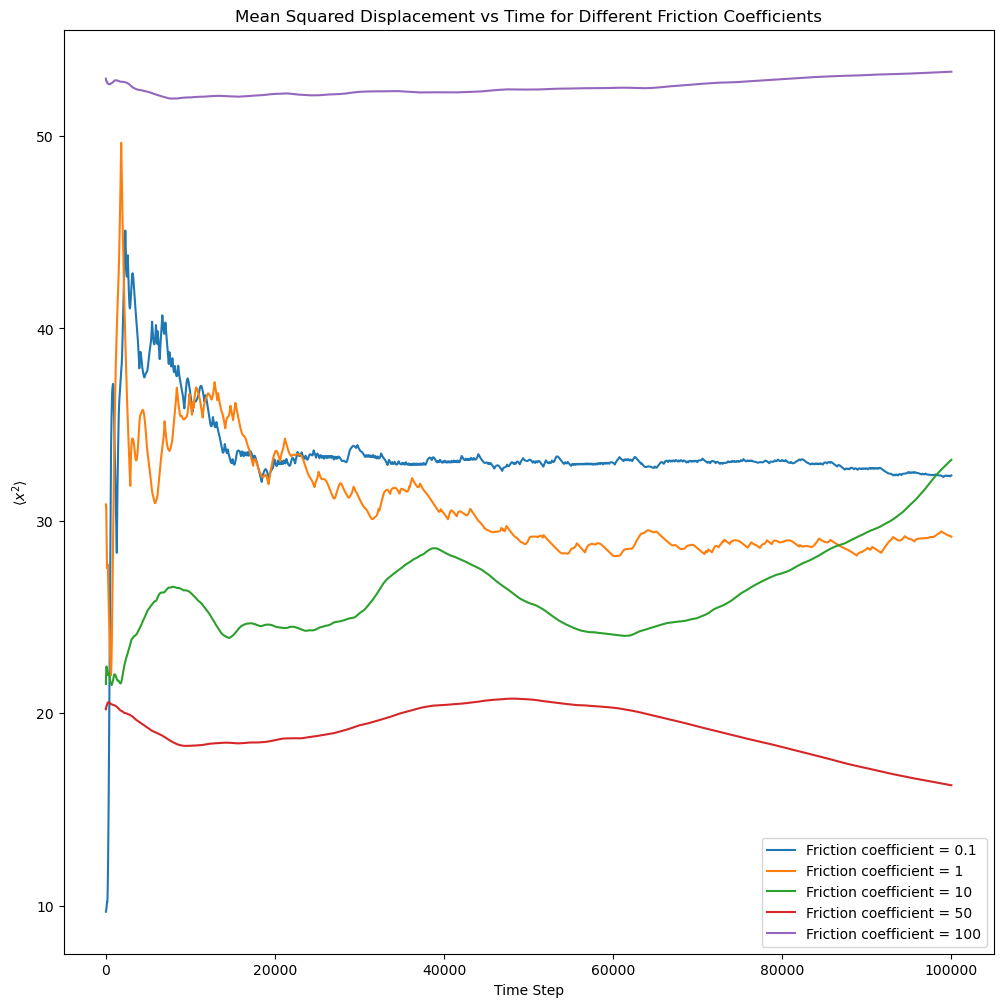

In [44]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_brownian_motion(T, gamma, L=10, dt=0.01, n_steps=100000):
    # Parameters
    D = T
    m = 1

    # Initial conditions
    x = np.random.uniform(0, L)
    v = np.random.normal(0, np.sqrt(D * dt))
    a = - (gamma / m) * v  # Initial acceleration

    # Arrays to store results
    positions = np.zeros(n_steps)
    squared_displacement = np.zeros(n_steps)

    for step in range(n_steps):
        # Store position and squared displacement
        positions[step] = x
        squared_displacement[step] = x**2

        # Update position
        x = x + v * dt + 0.5 * a * (dt ** 2)

        # Compute new acceleration
        xi = np.random.normal(0, 1)
        a_new = - (gamma / m) * v + np.sqrt(2 * D / dt) * xi

        # Update velocity
        v = v + 0.5 * (a + a_new) * dt

        # Update acceleration for the next step
        a = a_new

        # Apply periodic boundary conditions
        if x < 0:
            x += L
        elif x >= L:
            x -= L

    # Calculate mean squared displacement <x^2> over time
    mean_squared_displacement = np.cumsum(squared_displacement) / (np.arange(n_steps) + 1)
    
    return mean_squared_displacement

# Parameters for temperature and friction coefficient
temperatures = [0.1, 0.5, 1, 1.5, 2]
friction_coeffs = [0.1, 1, 10, 50, 100]

# Plot results for temperature variation
plt.figure(figsize=(12, 12))

for T in temperatures:
    msd = simulate_brownian_motion(T, gamma=1)
    plt.plot(msd, label=f'Temperature = {T}')

plt.xlabel('Time Step')
plt.ylabel(r'$\langle x^2 \rangle$')
plt.title('Mean Squared Displacement vs Time for Different Temperatures')
plt.legend()
plt.show()

# Plot results for friction coefficient variation
plt.figure(figsize=(12, 12))

for gamma in friction_coeffs:
    D = 1  # Setting temperature to 1 for these plots
    msd = simulate_brownian_motion(T=1, gamma=gamma)
    plt.plot(msd, label=f'Friction coefficient = {gamma}')

plt.xlabel('Time Step')
plt.ylabel(r'$\langle x^2 \rangle$')
plt.title('Mean Squared Displacement vs Time for Different Friction Coefficients')
plt.legend()
plt.show()


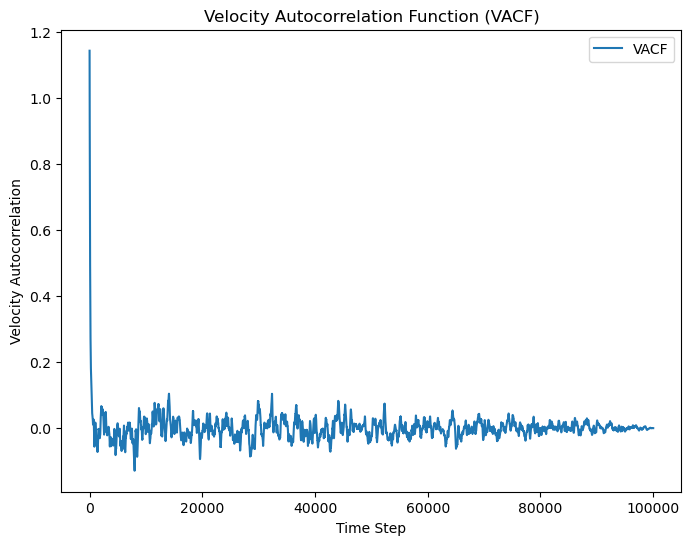

Diffusion coefficient (Green-Kubo): 0.009265410954977092


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_brownian_motion_with_vacf(T, gamma, L=10, dt=0.01, n_steps=100000):
    # Parameters
    D = T
    m = 1

    # Initial conditions
    x = np.random.uniform(0, L)
    v = np.random.normal(0, np.sqrt(D * dt))
    a = - (gamma / m) * v  # Initial acceleration

    # Arrays to store results
    positions = np.zeros(n_steps)
    squared_displacement = np.zeros(n_steps)
    velocities = np.zeros(n_steps)  # To store velocities for VACF

    for step in range(n_steps):
        # Store position, velocity, and squared displacement
        positions[step] = x
        squared_displacement[step] = x**2
        velocities[step] = v

        # Update position
        x = x + v * dt + 0.5 * a * (dt ** 2)

        # Compute new acceleration
        xi = np.random.normal(0, 1)
        a_new = - (gamma / m) * v + np.sqrt(2 * D / dt) * xi

        # Update velocity
        v = v + 0.5 * (a + a_new) * dt

        # Update acceleration for the next step
        a = a_new

        # Apply periodic boundary conditions
        if x < 0:
            x += L
        elif x >= L:
            x -= L

    # Calculate mean squared displacement <x^2> over time
    mean_squared_displacement = np.cumsum(squared_displacement) / (np.arange(n_steps) + 1)
    
    # Compute the velocity autocorrelation function (VACF)
    vacf = np.correlate(velocities, velocities, mode='full') / n_steps
    vacf = vacf[n_steps - 1:]  # Take the positive lag part
    
    # Calculate the diffusion coefficient using Green-Kubo relation (integral of VACF)
    diffusion_coefficient = np.sum(vacf) * dt
    
    return mean_squared_displacement, vacf, diffusion_coefficient

# Simulate Brownian motion with VACF for temperature T=1 and gamma=1
msd, vacf, diffusion_coefficient = simulate_brownian_motion_with_vacf(T=1, gamma=1)

# Plot the velocity autocorrelation function (VACF)
plt.figure(figsize=(8, 6))
plt.plot(vacf, label='VACF')
plt.xlabel('Time Step')
plt.ylabel('Velocity Autocorrelation')
plt.title('Velocity Autocorrelation Function (VACF)')
plt.legend()
plt.show()

print(f'Diffusion coefficient (Green-Kubo): {diffusion_coefficient}')


-1.1691946184027045e-05


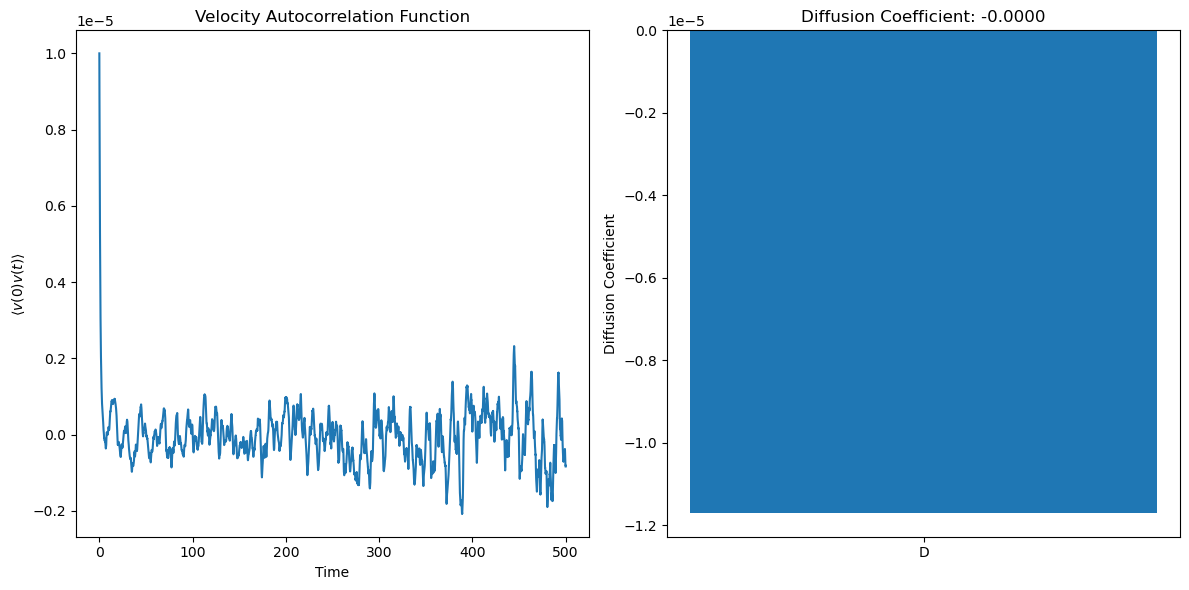

In [87]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_brownian_motion(T, gamma, L=10, dt=0.01, n_steps=100000):
    # Parameters
    D = T
    m = 1

    # Initial conditions
    x = np.random.uniform(0, L)
    v = np.random.normal(0, np.sqrt(D * dt))
    a = - (gamma / m) * v  # Initial acceleration

    # Arrays to store results
    positions = np.zeros(n_steps)
    velocities = np.zeros(n_steps)

    for step in range(n_steps):
        # Store position and velocity
        positions[step] = x
        velocities[step] = v

        # Update position
        x = x + v * dt + 0.5 * a * (dt ** 2)

        # Compute new acceleration
        xi = np.random.normal(0, 1)
        a_new = - (gamma / m) * v + np.sqrt(2 * D / dt) * xi

        # Update velocity
        v = v + 0.5 * (a + a_new) * dt

        # Update acceleration for the next step
        a = a_new

        # Apply periodic boundary conditions
        if x < 0:
            x += L
        elif x >= L:
            x -= L

    return velocities

def compute_diffusion_coefficient(velocities, dt):
    n_steps = len(velocities)
    max_lag = n_steps // 2
    vacf = np.zeros(max_lag)
    
    # Calcola la media delle velocità
    mean_velocity = np.mean(velocities)
    
    # Calcola la varianza delle velocità
    variance_velocity = np.var(velocities)
    
    # Calcola la funzione di autocorrelazione della velocità
    for lag in range(max_lag):
        vacf[lag] = np.mean((velocities[:n_steps-lag] - mean_velocity) * (velocities[lag:] - mean_velocity))
    
    # Normalizza
    vacf /= (variance_velocity * (n_steps - np.arange(max_lag)))
    
    # Compute the diffusion coefficient using Green-Kubo relation
    time = np.arange(n_steps) * dt
    D = 0.5 * np.trapz(vacf[:n_steps//2], time[:n_steps//2])  # Integrate only up to half the steps to avoid artifacts
    
    return D, vacf, time

# Parameters
T = 1
gamma = 1

# Run simulation
velocities = simulate_brownian_motion(T, gamma)

# Compute diffusion coefficient
D, vacf, time = compute_diffusion_coefficient(velocities, dt=0.01)
print(D)
# Plot results
plt.figure(figsize=(12, 6))

# Plot velocity autocorrelation function
plt.subplot(1, 2, 1)
plt.plot(time[:len(vacf)], vacf[:len(time[:len(vacf)])])
plt.xlabel('Time')
plt.ylabel(r'$\langle v(0) v(t) \rangle$')
plt.title('Velocity Autocorrelation Function')

# Display diffusion coefficient
plt.subplot(1, 2, 2)
plt.bar(['D'], [D])
plt.ylabel('Diffusion Coefficient')
plt.title(f'Diffusion Coefficient: {D:.4f}')

plt.tight_layout()
plt.show()



# ESERCIZIO 2

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 20
m = 1
epsilon = 1
n_steps = 100000
dt = 0.01

def simulate_particle(K, gamma, T, initial_position):
    # Initialize
    x = initial_position
    v = np.random.normal(0, np.sqrt(2*T),2)
    r0 = np.array([5,5])
    
    # Store positions and velocities
    positions = np.zeros((n_steps, 2))
    
    for step in range(n_steps):
        # Store position
        positions[step] = x
        
        # Langevin dynamics update
        xi = np.random.normal(0, 1, 2)
        
        v = v - gamma*v*dt -  (K) * (x - r0) * dt / gamma + np.sqrt(2 * T / gamma) * xi * np.sqrt(dt)
        x = x + v * dt
        
        # Apply periodic boundary conditions
        x = np.mod(x, L)
    
    return positions

def compute_average(positions):
    avg_position = np.mean(positions, axis=0)
    
    return avg_position

def compute_variance(positions):
    
    var_position = np.var(positions, axis=0)
    return  np.sqrt(var_position)



# Example parameters
K = 100
gamma = 1
T = 1
initial_position = np.array([17,3])

positions = simulate_particle(K, gamma, T, initial_position)
print(positions)

[[17.          3.        ]
 [16.87409632  3.02890453]
 [16.63115295  3.07766326]
 ...
 [17.57856295  5.14282088]
 [12.57107813  5.13899418]
 [ 7.53937945  5.13383416]]


Text(0, 0.5, 'Position X')

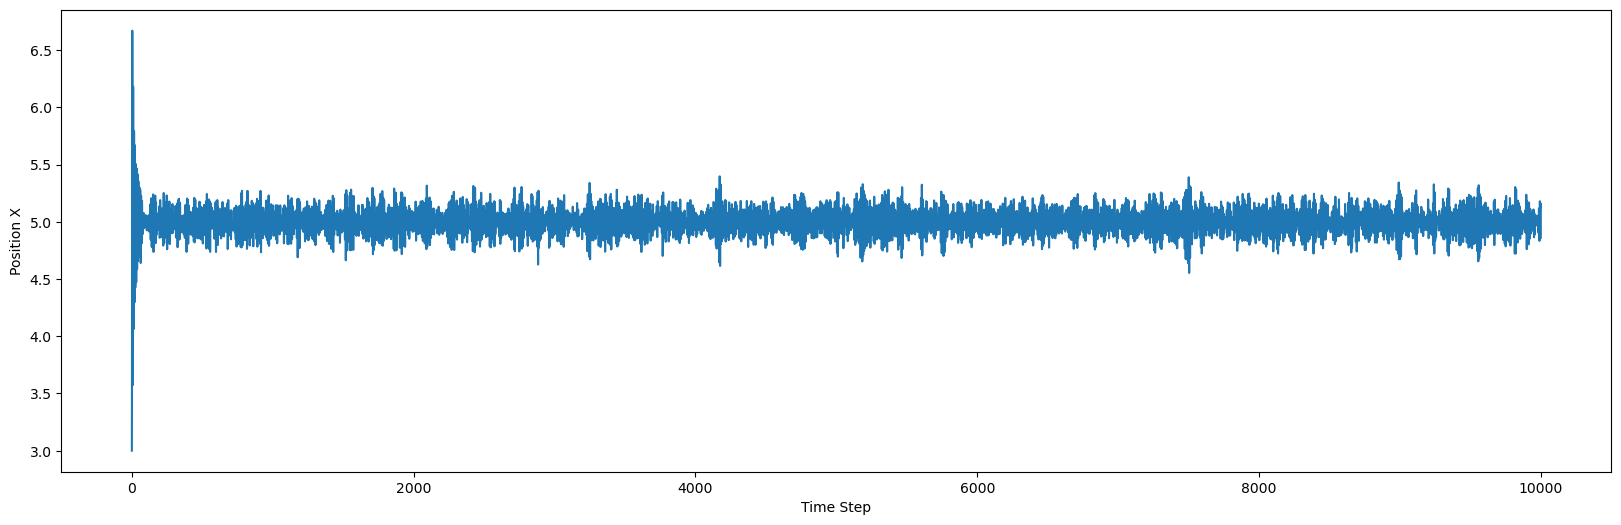

In [13]:
time=np.arange(0,10000,0.1)

plt.figure(figsize=(20, 6))
plt.plot(time, positions[:,1])
plt.xlabel('Time Step')
plt.ylabel('Position X')

VARIA LA TEMPERATURA

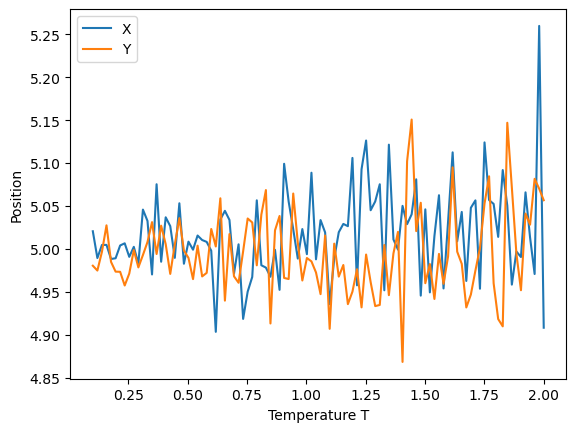

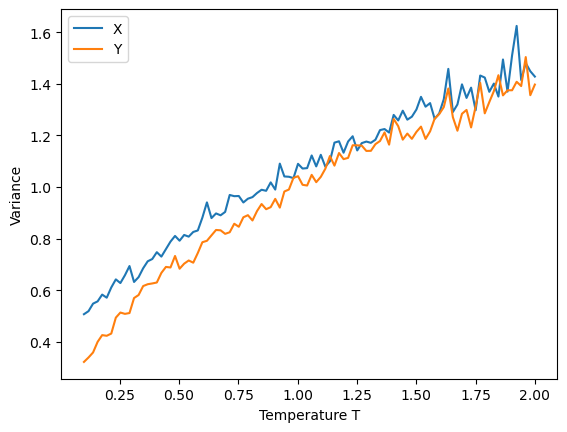

In [20]:
K = 1
gamma = 1
T=np.linspace(0.1,2,100)
avg=[]
var=[]
for t in T:
    positions = simulate_particle(K, gamma, t, initial_position)
    avg.append(compute_average(positions))
    var.append(compute_variance(positions))

# Convert to arrays for plotting
avg = np.array(avg)
var = np.array(var)

# Plot average positions (X and Y components)
plt.plot(T, avg[:, 0], label='X')
plt.plot(T, avg[:, 1], label='Y')
plt.xlabel('Temperature T')
plt.ylabel('Position')
plt.legend()  # Add a legend to distinguish X and Y
plt.show()

# Plot variances (X and Y components)
plt.plot(T, var[:, 0], label='X')
plt.plot(T, var[:, 1], label='Y')
plt.xlabel('Temperature T')
plt.ylabel('Variance')
plt.legend()  # Add a legend to distinguish X and Y
plt.show()

Varia K

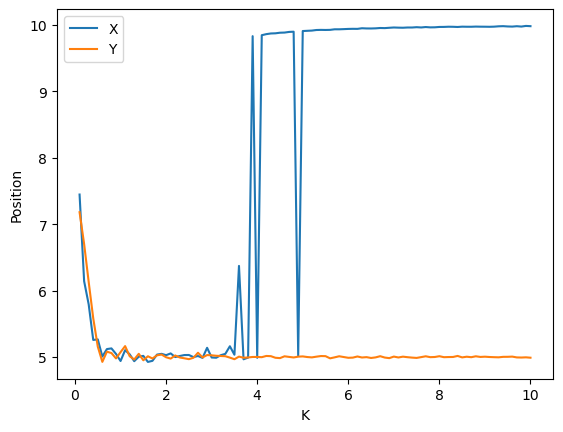

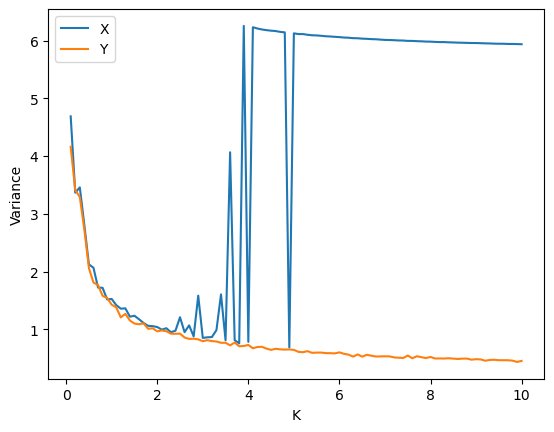

In [21]:

gamma = 1
T = 1
initial_position = np.array([17,3])
K=np.linspace(0.1,10,100)
avg=[]
var=[]
for k in K:
    positions = simulate_particle(k, gamma, t, initial_position)
    avg.append(compute_average(positions))
    var.append(compute_variance(positions))
# Convert to arrays for plotting
avg = np.array(avg)
var = np.array(var)

# Plot average positions (X and Y components)
plt.plot(K, avg[:, 0], label='X')
plt.plot(K, avg[:, 1], label='Y')
plt.xlabel('K')
plt.ylabel('Position')
plt.legend()  # Add a legend to distinguish X and Y
plt.show()

# Plot variances (X and Y components)
plt.plot(K, var[:, 0], label='X')
plt.plot(K, var[:, 1], label='Y')
plt.xlabel('K')
plt.ylabel('Variance')
plt.legend()  # Add a legend to distinguish X and Y
plt.show()

varia gamma

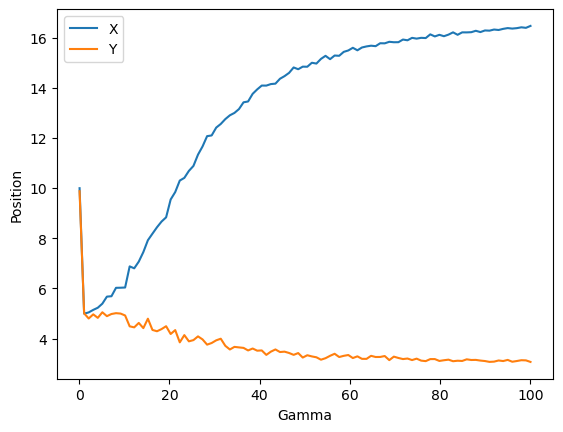

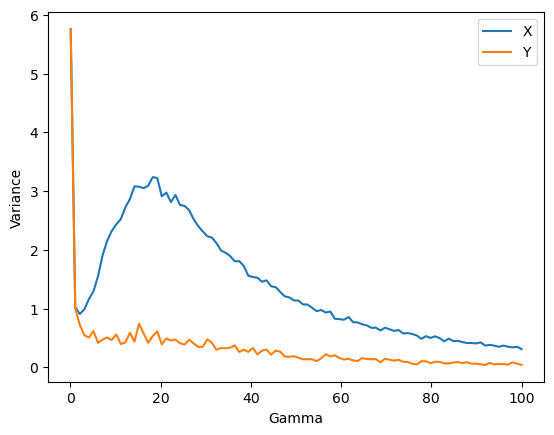

In [22]:
gamma = np.linspace(0.1,100,100)
T = 1
initial_position = np.array([17,3])
K=1
avg=[]
var=[]
for g in gamma:
    positions = simulate_particle(K, g, T, initial_position)
    avg.append(compute_average(positions))
    var.append(compute_variance(positions))
# Convert to arrays for plotting
avg = np.array(avg)
var = np.array(var)

# Plot average positions (X and Y components)
plt.plot(gamma, avg[:, 0], label='X')
plt.plot(gamma, avg[:, 1], label='Y')
plt.xlabel('Gamma')
plt.ylabel('Position')
plt.legend()  # Add a legend to distinguish X and Y
plt.show()

# Plot variances (X and Y components)
plt.plot(gamma, var[:, 0], label='X')
plt.plot(gamma, var[:, 1], label='Y')
plt.xlabel('Gamma')
plt.ylabel('Variance')
plt.legend()  # Add a legend to distinguish X and Y
plt.show()

### secondo punto

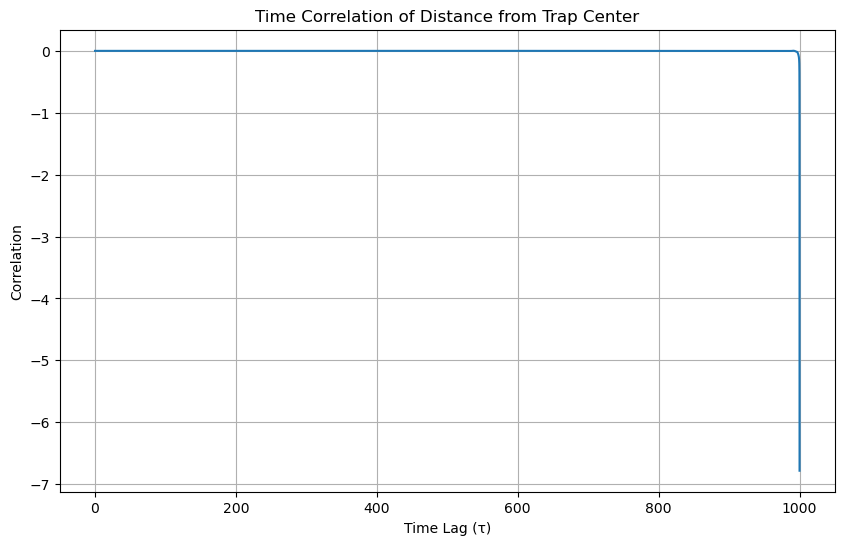

In [228]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 20
K = 1
gamma = 1
T = 1
dt =0.01
n_steps = 100000
initial_position = np.array([7,9])  # Example initial position

def simulate_particle(K, gamma, T, initial_position):
    # Initialize
    x = initial_position
    v = np.random.normal(0, np.sqrt(2*T), 2)
    r0 = np.array([5,5])
    
    # Store positions
    positions = np.zeros((n_steps, 2))
    
    for step in range(n_steps):
        # Store position
        positions[step] = x
        
        # Langevin dynamics update
        xi = np.random.normal(0, 0.05, 2)
        a = - (K / gamma) * (x - r0)
        v = v  - gamma*v*dt - (K / gamma) * (x - r0)* dt / gamma + np.sqrt(2 * T / gamma) * xi * np.sqrt(dt)
        x = x + v * dt
        
        # Apply periodic boundary conditions
        x = np.mod(x, L)
    
    return positions

def compute_time_correlation(positions, dt):
    # Calcola la distanza dalla posizione centrale (supposta all'origine)
    distances = positions[:, 1]  # Assumiamo che stiamo lavorando sull'asse x
    n = len(distances)
    max_lag = n   # Utilizza metà dei dati per evitare errori
    correlation = np.zeros(max_lag)
    
    # Calcola la media delle distanze
    mean_distance = np.mean(distances)
    
    # Calcola la varianza delle distanze
    variance_distance = np.var(distances)
    
    # Calcola la funzione di correlazione temporale
    for lag in range(max_lag):
        correlation[lag] = np.mean((distances[:n-lag] - mean_distance) * (distances[lag:] - mean_distance))
    
    # Normalizza
    correlation /= (variance_distance * (np.arange(max_lag, 0, -1)))
    
    return correlation

# Run simulation
positions = simulate_particle(K, gamma, T, initial_position)

# Compute time correlation
correlation = compute_time_correlation(positions, dt)
time_lags = np.arange(len(correlation)) * dt

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(time_lags, correlation)
plt.xlabel('Time Lag (τ)')
plt.ylabel('Correlation')
plt.title('Time Correlation of Distance from Trap Center')
plt.grid(True)
plt.show()


In [232]:
print(correlation)

[ 1.00000000e-05  9.96961417e-06  9.93852932e-06 ... -2.27119258e+00
 -3.39893859e+00 -6.78307642e+00]


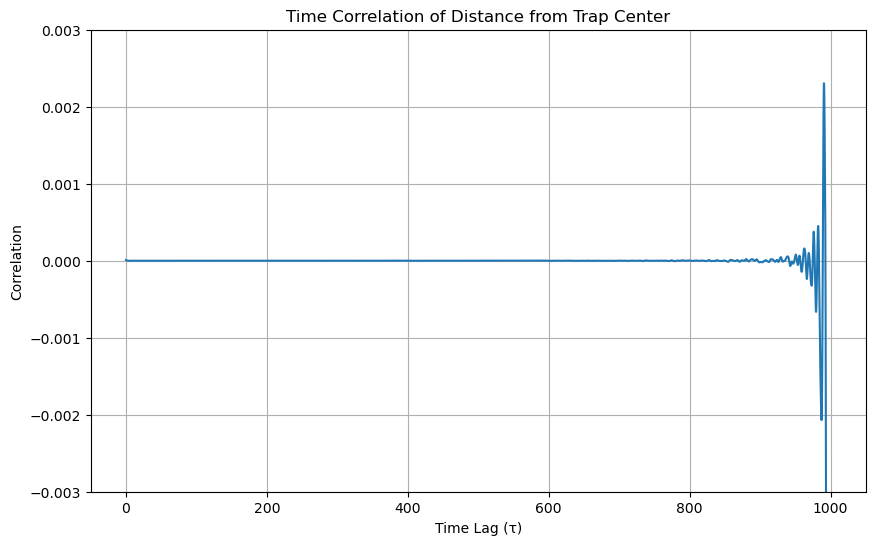

In [241]:
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(time_lags, correlation)
plt.xlabel('Time Lag (τ)')
plt.ylabel('Correlation')
plt.title('Time Correlation of Distance from Trap Center')
plt.grid(True)
plt.ylim(-0.003,0.003)
plt.show()

terzo punto

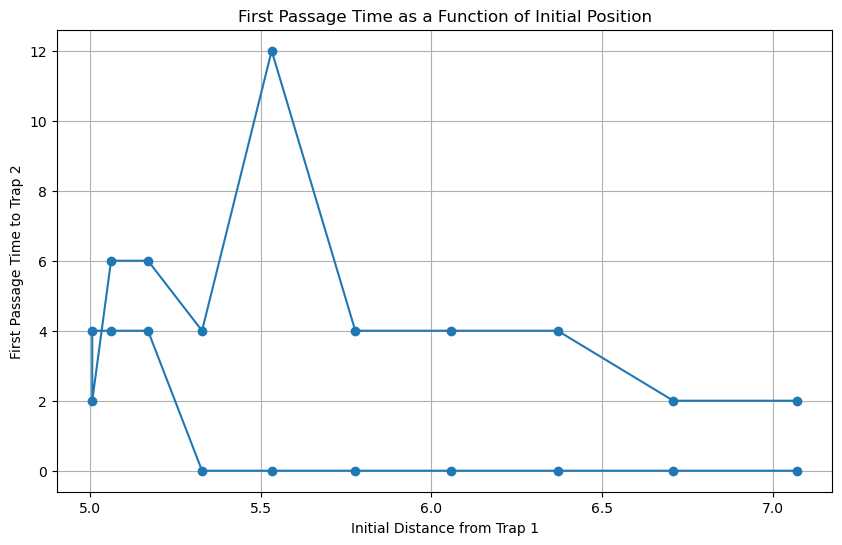

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 20
K = 1
gamma = 1
T = 1
dt = 2
n_steps = 100000
d = 5  # Distance between traps

def simulate_particle(K, gamma, T, initial_position, d):
    # Initialize
    x = initial_position
    v = np.random.normal(0, np.sqrt(T), 2)
    r0 = np.array([5, 5])  # Position of the first trap
    r1 = np.array([5 + 2 * d, 5])  # Position of the second trap
    
    # Store positions
    positions = np.zeros((n_steps, 2))
    
    for step in range(n_steps):
        # Store position
        positions[step] = x
        
        # Langevin dynamics update
        xi = np.random.normal(0, 1, 2)
        a0 = - (K / gamma) * (x - r0)
        a1 = - (K / gamma) * (x - r1)
        # Potential force from both traps
        a = a0 + a1
        v = v + (a * dt / gamma)-v*gamma*dt + np.sqrt(2 * T / gamma) * xi * np.sqrt(dt)
        x = x + v * dt
        
        # Apply periodic boundary conditions
        x = np.mod(x, L)
    
    return positions

def compute_first_passage_time(positions, r1):
    # Calcola la distanza dalla posizione centrale (supposta all'origine)
    distances_from_r1 = np.linalg.norm(positions - r1, axis=1)
     
    # Trova il primo istante in cui la particella è più vicina alla seconda trappola
    first_passage_times = np.where(distances_from_r1 < np.linalg.norm(r1 - np.array([5, 5])))[0]
    
    if len(first_passage_times) > 0:
        return first_passage_times[0] * dt
    else:
        return np.nan

# Esegui la simulazione e calcola il tempo medio di prima occasione
initial_positions = np.linspace([0, 0], [10, 0], num=20)  # Varie posizioni iniziali
first_passage_times = []
for pos in initial_positions:
    positions = simulate_particle(K, gamma, T, pos, d)
    time = compute_first_passage_time(positions, np.array([5 + 2 * d, 5]))
    first_passage_times.append(time)

# Analizza e visualizza i risultati
initial_positions = np.linalg.norm(initial_positions - np.array([5, 5]), axis=1)  # Distanza iniziale dal centro della prima trappola

plt.figure(figsize=(10, 6))
plt.plot(initial_positions, first_passage_times, 'o-' )
plt.xlabel('Initial Distance from Trap 1')
plt.ylabel('First Passage Time to Trap 2')
plt.title('First Passage Time as a Function of Initial Position')
plt.grid(True)
plt.show()


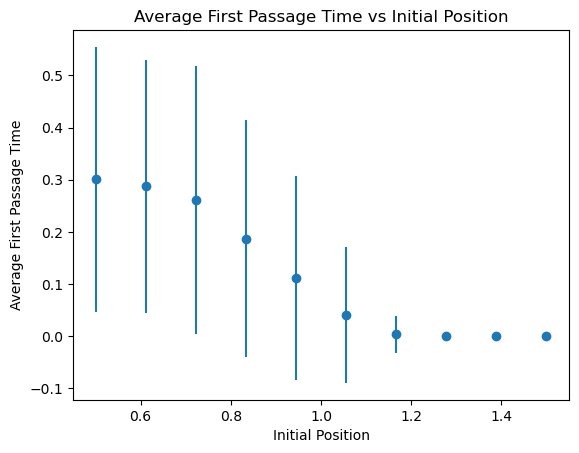

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def potential(r):
    K = 1
    r0 = np.array([0, 0])
    return 0.5 * K * np.sum((r - r0)**2)

def simulate_fpt(initial_position, num_trials=1000, dt=0.01):
    fpt_times = []
    
    for _ in range(num_trials):
        position = np.array(initial_position)
        time = 0
        
        while True:
            # Random displacement due to thermal fluctuations
            noise = np.random.normal(0, np.sqrt(dt), size=2)
            position += noise
            
            # Apply periodic boundary conditions
            position = position % 20
            
            # Check distances to traps
            dist_to_first = np.linalg.norm(position - np.array([0, 0]))
            dist_to_second = np.linalg.norm(position - np.array([2, 0]))
            
            if dist_to_second < dist_to_first:
                fpt_times.append(time)
                break
            
            time += dt
            
    return np.mean(fpt_times), np.var(fpt_times)

# Vary initial positions
initial_positions = np.linspace(0.5, 1.5, 10)
avg_fpt = []
var_fpt = []

for pos in initial_positions:
    avg, var = simulate_fpt((pos, 0))
    avg_fpt.append(avg)
    var_fpt.append(var)

# Plotting results
plt.figure()
plt.errorbar(initial_positions, avg_fpt, yerr=np.sqrt(var_fpt), fmt='o')
plt.xlabel('Initial Position')
plt.ylabel('Average First Passage Time')
plt.title('Average First Passage Time vs Initial Position')
plt.show()
